**Практика: "Бинарная классификация линейно разделимых классов"**

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression

In [14]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_auc_score, roc_curve, RocCurveDisplay

Загрузить данные из файла "practice_classification.csv", используя функцию pd.read_csv(), в качестве параметра header указать значение None. После чего изменить атрибут columns нового датафрейма на список ['X1', 'X2', 'target'].

In [15]:
data = ?
data.columns = ['X1', 'X2', 'target']

In [16]:
data.head()

,X1,X2,target
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


**1. Предобработка данных.**

1.1. С помощью метода value_counts() рассчитать количество экземпляров каждого класса.

In [17]:
?

,count
target,
1,60
0,40


1.2. Разделить данные на две части (обучающую и тестовую выборку) в отношении 80 на 20 или 70 на 30. Можно использовать функцию train_test_split библиотеки sklearn.model_selection. Для проверки результатов установить параметр random_state = 0.

In [18]:
?

Проверить сбалансированность классов в полученных подвыборках.

In [19]:
?

(target
 1    41
 0    29
 Name: count, dtype: int64,
 target
 1    19
 0    11
 Name: count, dtype: int64)

1.3. Представить данные обучающей выборки графически. Можно использовать функцию scatter() библиотеки pyplot. Объекты разных классов изобразить пазными маркерами/цветом. По графику предположить вид границы между классами.

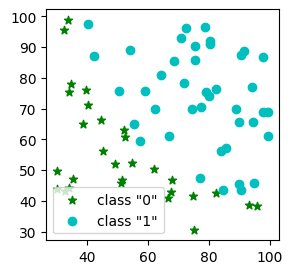

In [20]:
?

1.4. Проверить не являются ли признаки линейно-зависимыми. Построить диаграмму рассеивания $X2(X1)$ и оценить парный коэффициент корреляции $r(X1, X2)$.

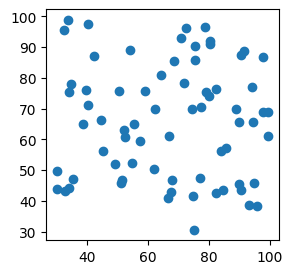

,X1,X2
X1,1.000000,-0.024111
X2,-0.024111,1.000000


In [21]:
?

1.5. Нормировать признаки в диапазоне [0;1]. Обратить внимание на то, чтобы соответствующие масштабы у признаков $(Xj_{max}-Xj_{min})$ для обучающей и тестовой выборки были одинаковыми соответственно.

In [22]:
scaler = MinMaxScaler()
scaler.fit(data[['X1','X2']])
X_train_norm = scaler.transform(data_train[['X1','X2']])
X_test_norm = scaler.transform(data_test[['X1','X2']])

**2. Обучение модели классификации**

2.1. С помощью класса LogisticRegression() обучить модель классификации на основе логистической регрессии. Для сравнения результатов задать параметр random_state = 0.

In [23]:
model_1 = LogisticRegression()
model_1.fit(X_train_norm, data_train.target)


LogisticRegression()

2.2. Для обучающей и тестовой выборки предсказать значение классов с помощью модели из п.2.1.

In [24]:
y_predict_train = model_1.predict(X_train_norm)
y_predict_test = model_1.predict(X_test_norm)

2.2.1. Для обучающей выборки представить результат графически:
- предсказанные и истинные значения целевой переменной для обучающей выборки;
- вывести значения весовых коэффициентов логистической регрессии и  изобразить линейную границу между классами для обучающей выборки $\theta_0 + \theta_1 x_1 + \theta_2 x_2 = 0$.

In [25]:
Theta = np.zeros((3))
Theta[0] = model_1.intercept_
Theta[1:] = model_1.coef_
Theta

<ipython-input-25-6cec455d4921>:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Theta[0] = model_1.intercept_


array([-2.16377763,  2.67704884,  2.26364988])

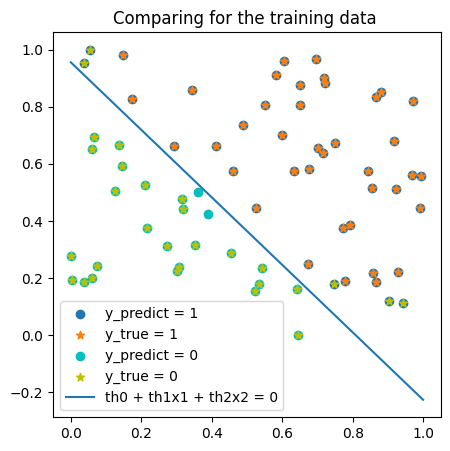

In [26]:
?

2.3. Рассчитать метрики качества для модели из п. 2.1.

2.3.1. Доля верных ответов (accuracy) для обучающей и тестовой выборки.

In [27]:
accuracy_train = ?
accuracy_test = ?

In [28]:
print('accuracy_train = {:.3}%'.format(accuracy_train*100))
print('accuracy_test = {:.3}%'.format(accuracy_test*100))

accuracy_train = 90.0%
accuracy_test = 93.3%


2.3.2. Рассчитать матрицу ошибок (confusion matrix), а так же метрики Precision, Recall, F1-score для класса y=1 для обучающей и тестовой выборки соответственно.

In [29]:
def confusion_matrix_function(y_true, y_pred, type_of_sample):
  conf_matrix = confusion_matrix(y_true, y_pred)
  disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
  disp.plot()
  plt.title('Confusion matrix for the ' + type_of_sample)
  plt.show()
  return conf_matrix

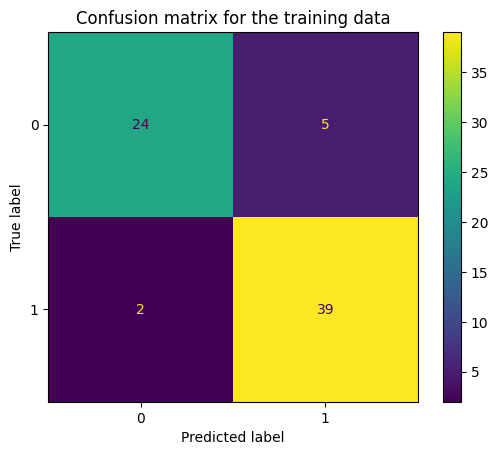

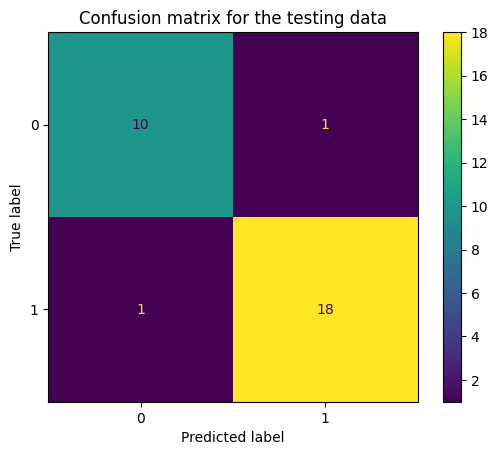

In [30]:
cm_train = ?
cm_test = ?

In [31]:
rate_train = precision_recall_fscore_support(?)
rate_test = precision_recall_fscore_support(?)
print('For the class "1" of the training data:\nPrecision = {0:.3},\nRecall = {1:.3},\nF1-score = {2:.3}\n'.format(rate_train[0],rate_train[1], rate_train[2]))
print('For the class "1" of the testing data:\nPrecision = {0:.3},\nRecall = {1:.3},\nF1-score = {2:.3}\n'.format(rate_test[0],rate_test[1], rate_test[2]))

For the class "1" of the training data:
Precision = 0.886,
Recall = 0.951,
F1-score = 0.918

For the class "1" of the testing data:
Precision = 0.947,
Recall = 0.947,
F1-score = 0.947



\* 2.3.3. Построить график ROC-кривой и рассчитать метрику AUC-ROC для позитивного класса (y=1).

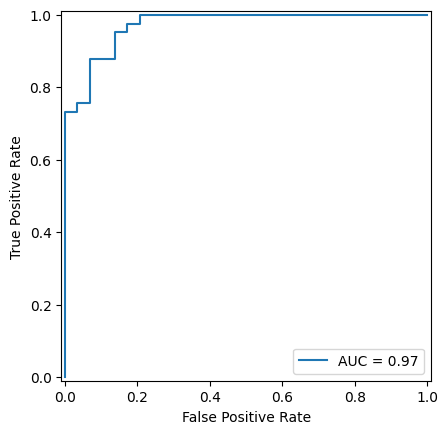

In [33]:
y_proba_train = model_1.predict_proba(X_train_norm)

?